In [2]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from AC import Ac

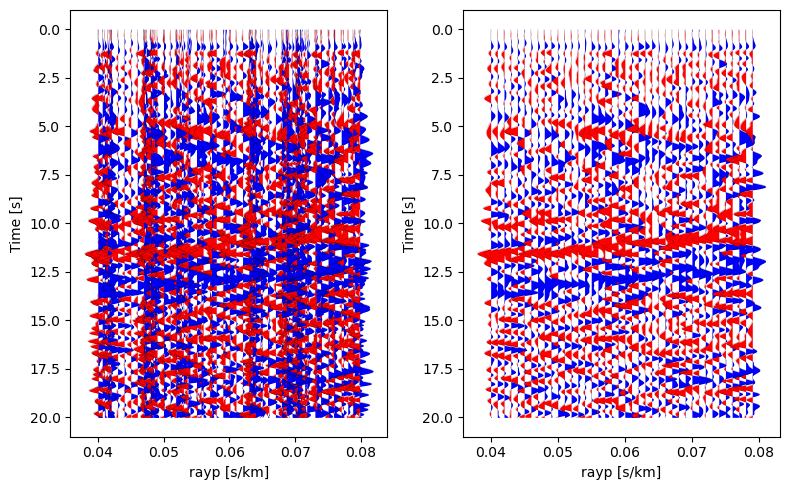

In [13]:
maindir = "Varyp_sediment_crust_mantle_synthetics_c35_dt0.01_f0.1_f0.5/"
snr = 12
ST = 10
length = 20
datadir  = f"{maindir}/sediments_depth3_snr{snr}_ST{ST}"

do_Ac = Ac(datadir=datadir,suffix=f".Zsn.SAC",tref=5.,pretime=-5,length=100,f1=0.1,f2=2,tcos=2,df=0.1)
do_Ac.cal_ACs()
stream_zacs = do_Ac.ACst

do_Ac.stack_ACs(0.04,0.08,0.001,0.002)

stream_zacm = do_Ac.ACst
stream_zacm_stack = do_Ac.ACst_stack
fig = plt.figure(figsize=(8,5),tight_layout=True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for tr in stream_zacm:
    baz = tr.stats.sac['user0']
    delta = tr.stats.delta
    starttime = tr.stats.starttime
    tr.trim(starttime,starttime+length)
    data = tr.data/(-1*tr.data.min())*0.002
    times = np.arange(len(data))*delta
    ax1.plot(data+baz, times, lw=0.1, color='k')
    data_fill = data.copy()
    data_fill[data_fill>0] = 0
    ax1.fill_betweenx(times, baz, baz+data_fill, color='red', lw=0.01)
    data_fill = data.copy()
    data_fill[data_fill<0] = 0
    ax1.fill_betweenx(times, baz, baz+data_fill, color='blue', lw=0.01)

for tr in stream_zacm_stack:
    baz = tr.stats.sac['user0']
    delta = tr.stats.delta
    starttime = tr.stats.starttime
    tr.trim(starttime,starttime+length)
    data = tr.data/(-1*tr.data.min())*0.002
    times = np.arange(len(data))*delta
    ax2.plot(data+baz, times, lw=0.1, color='k')
    data_fill = data.copy()
    data_fill[data_fill>0] = 0
    ax2.fill_betweenx(times, baz, baz+data_fill, color='red', lw=0.01)
    data_fill = data.copy()
    data_fill[data_fill<0] = 0
    ax2.fill_betweenx(times, baz, baz+data_fill, color='blue', lw=0.01)

ax1.invert_yaxis()
ax1.set_xlabel("rayp [s/km]")
ax1.set_ylabel("Time [s]")

ax2.invert_yaxis()
ax2.set_xlabel("rayp [s/km]")
ax2.set_ylabel("Time [s]")

plt.show()



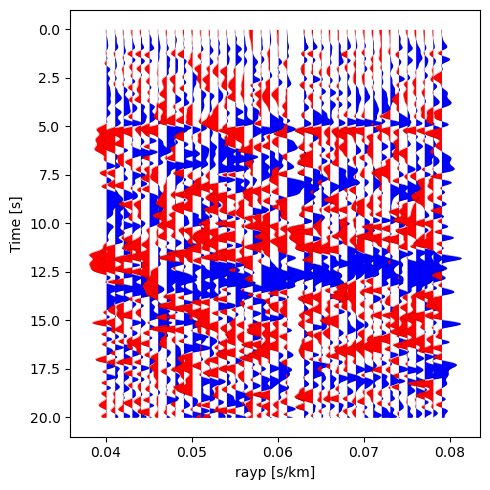

In [74]:
maindir = "Varyp_sediment_crust_mantle_synthetics_c35_dt0.01_f0.1_f0.5_randomlogT_Nst30_Nst100"
snr =12
length = 20
datadir  = f"{maindir}/sediments_depth3_snr{snr}"

do_Ac = Ac(datadir=datadir,suffix=f".Zsn.SAC",tref=5.,pretime=-5,length=100,f1=0.1,f2=2,tcos=2,df=0.1)
do_Ac.cal_ACs()
stream_zacs = do_Ac.ACst

do_Ac.stack_ACs(0.04,0.08,0.001,0.002)

stream_zacm = do_Ac.ACst
stream_zacm_stack = do_Ac.ACst_stack
fig = plt.figure(figsize=(5,5),tight_layout=True)

ax2 = fig.add_subplot(111)


for tr in stream_zacm_stack:
    baz = tr.stats.sac['user0']
    delta = tr.stats.delta
    starttime = tr.stats.starttime
    tr.trim(starttime,starttime+length)
    data = tr.data/(-1*tr.data.min())*0.002
    times = np.arange(len(data))*delta
    ax2.plot(data+baz, times, lw=0.1, color='k')
    data_fill = data.copy()
    data_fill[data_fill>0] = 0
    ax2.fill_betweenx(times, baz, baz+data_fill, color='red', lw=0.01)
    data_fill = data.copy()
    data_fill[data_fill<0] = 0
    ax2.fill_betweenx(times, baz, baz+data_fill, color='blue', lw=0.01)

ax2.invert_yaxis()
ax2.set_xlabel("rayp [s/km]")
ax2.set_ylabel("Time [s]")

plt.show()
